In [3]:
import numpy as np
import matplotlib.pyplot as plt
from acrobotics.recources.robots import Kuka
from acrobotics.recources.path_on_table import path_pos_tol, scene, path_ori_free
from pyquaternion import Quaternion

In [5]:
robot = Kuka()
# path = path_pos_tol
path = path_ori_free
num_samples = 100

In [9]:
%%capture
from acrobotics.planning import cart_to_joint_iterative

res = cart_to_joint_iterative(robot, path, scene, num_samples=num_samples, max_iters=10)
qp_sol = res['path']

In [6]:
from acrobotics.util import get_default_axes3d,plot_reference_frame

# fig, ax = plt.subplots()
# ax.plot(, 'o-')
# ax.set_title('Cost as function of iterations')
with plt.xkcd():
    plt.plot(res['costs'], 'o-')
    plt.xlabel('Iterations')
    plt.ylabel('Path length')
    plt.title('Cost for {} samples / iteration'.format(num_samples))
plt.show()

NameError: name 'res' is not defined

In [1]:
cost100 = [13.86143970489502,
 7.479045391082764,
 5.256309986114502,
 4.516974449157715,
 4.212845325469971,
 4.105308532714844,
 4.064762115478516,
 4.0388312339782715,
 4.030017852783203,
 4.024698734283447]

cost200 = [9.880289077758789,
 3.668997287750244,
 2.033181667327881,
 1.646599531173706,
 1.5199790000915527,
 1.4670681953430176,
 1.4356036186218262,
 1.421812891960144,
 1.4117776155471802,
 1.4041262865066528]

cost500 = [6.422471046447754,
 2.1818907260894775,
 1.2387447357177734,
 0.9881799221038818,
 0.8838732242584229,
 0.8156566619873047,
 0.7622273564338684,
 0.728502094745636,
 0.7162195444107056,
 0.7121531367301941]

cost700 = [5.700068473815918,
 1.9481189250946045,
 1.0921387672424316,
 0.9524911046028137,
 0.8154604434967041,
 0.7509426474571228,
 0.7199355363845825,
 0.7006202340126038,
 0.6946786046028137,
 0.6893659234046936]

cost1000 = [4.705536365509033,
 1.55204439163208,
 0.9192710518836975,
 0.7844072580337524,
 0.735163152217865,
 0.698646068572998,
 0.6792587041854858,
 0.6664291024208069,
 0.6584281325340271,
 0.6552361249923706]

cost_iter = [cost100, cost200, cost500, cost700, cost1000]

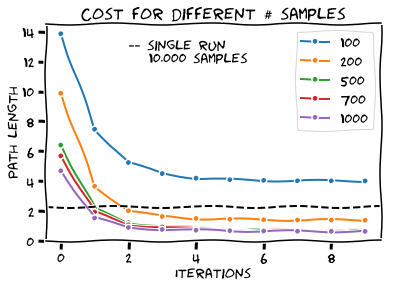

In [6]:
with plt.xkcd():
    fig, ax = plt.subplots()
    opts = '.-'
    for c in cost_iter:
        ax.plot(c, opts)
    
    ax.axhline(2.30541, linestyle='--', color='k')
    ax.text(2, 12, '-- single run\n   10.000 samples', fontsize=14)
    
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Path length')
    ax.set_title('Cost for different # samples'.format(num_samples))
    ax.legend(['100', '200', '500', '700', '1000'])
plt.show()

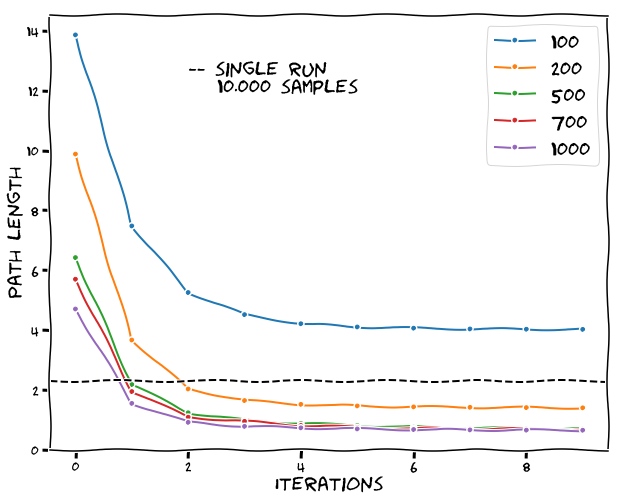

In [13]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 8))
    opts = '.-'
    for c in cost_iter:
        ax.plot(c, opts)
    
    ax.axhline(2.30541, linestyle='--', color='k')
    ax.text(2, 12, '-- single run\n   10.000 samples', fontsize=20)
    
    ax.set_xlabel('Iterations', fontsize=20)
    ax.set_ylabel('Path length', fontsize=20)
    #ax.set_title('Path lenght vs # samples'.format(num_samples))
    ax.legend(['100', '200', '500', '700', '1000'], fontsize=20)
plt.show()

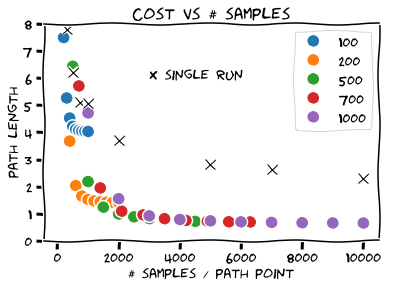

In [58]:
it = np.array(range(1, 11))
s = np.array([100, 200, 500, 700, 1000])

s_iter = []
for i in range(5):
    s_iter.append(s[i] * it)

# data for fixed stuff
s_fixed = [50, 100, 200, 300, 500, 750, 1000, 2000, 5000, 7000]
c_fixed = [20.45015525817871,
 15.496234893798828,
 9.976048469543457,
 7.798126220703125,
 6.232065200805664,
 5.128337383270264,
 5.063283920288086, 3.710268974304199, 2.8270692825317383, 2.6454219818115234]

with plt.xkcd():   
    fig, ax = plt.subplots()    

    for i in range(5):
        ax.plot(s_iter[i], cost_iter[i], 'o', markerSize=10)
    ax.legend(['100', '200', '500', '700', '1000'])
    
    #ax.axhline(2.30541, linestyle='--', color='k')

    ax.plot(10000, 2.30541, 'kx', markerSize=10)
    ax.plot(s_fixed, c_fixed, 'kx', markerSize=10)
    ax.text(3000, 6, 'x single run', fontsize=14)

    ax.set_ylim([0, 8])
    ax.set_xlabel('# samples / path point')
    ax.set_ylabel('path length')
    ax.set_title('Cost vs # samples')

In [39]:
s_iter

[array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000]),
 array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]),
 array([ 700, 1400, 2100, 2800, 3500, 4200, 4900, 5600, 6300, 7000]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000])]

In [9]:
# from acrobotics.planning import get_shortest_path, cart_to_joint_no_redundancy

# Q = cart_to_joint_no_redundancy(robot, path, scene, num_samples=10000)
# res = get_shortest_path(Q, method='dijkstra')

# res

Processing point 0/15
Processing point 1/15
Processing point 2/15
Processing point 3/15
Processing point 4/15
Processing point 5/15
Processing point 6/15
Processing point 7/15
Processing point 8/15
Processing point 9/15
Processing point 10/15
Processing point 11/15
Processing point 12/15
Processing point 13/15
Processing point 14/15


{'success': True,
 'path': [array([-0.29433519,  1.34895003, -0.25587296, -2.77809644,  1.47094047,
          2.14938116]),
  array([-0.26054999,  1.3540771 , -0.26395613, -2.78102946,  1.49223781,
          2.1701951 ]),
  array([-0.22234513,  1.36058819, -0.27071586, -2.81250763,  1.50052536,
          2.21650028]),
  array([-0.18109089,  1.37694049, -0.28408185, -2.86068439,  1.45433378,
          2.25848222]),
  array([-0.13709755,  1.38106525, -0.28645962, -2.9262526 ,  1.46084833,
          2.31485605]),
  array([-0.10752615,  1.3896544 , -0.29696694, -2.88392091,  1.43672097,
          2.37877512]),
  array([-0.07814109,  1.39910257, -0.30826128, -2.83724809,  1.40079379,
          2.40021992]),
  array([-0.03802247,  1.39929223, -0.30690864, -2.87011695,  1.40419126,
          2.44346571]),
  array([-1.94922835e-03,  1.40876520e+00, -3.14976007e-01, -2.86994815e+00,
          1.35350680e+00,  2.46185994e+00]),
  array([ 0.03323744,  1.39400887, -0.30136621, -2.8695569 ,  1.4151

In [13]:
cost10000 = 2.3054163455963135
path10000 = np.array([[-2.94335186e-01,  1.34895003e+00, -2.55872965e-01,
        -2.77809644e+00,  1.47094047e+00,  2.14938116e+00],
       [-2.60549992e-01,  1.35407710e+00, -2.63956130e-01,
        -2.78102946e+00,  1.49223781e+00,  2.17019510e+00],
       [-2.22345129e-01,  1.36058819e+00, -2.70715863e-01,
        -2.81250763e+00,  1.50052536e+00,  2.21650028e+00],
       [-1.81090891e-01,  1.37694049e+00, -2.84081846e-01,
        -2.86068439e+00,  1.45433378e+00,  2.25848222e+00],
       [-1.37097552e-01,  1.38106525e+00, -2.86459625e-01,
        -2.92625260e+00,  1.46084833e+00,  2.31485605e+00],
       [-1.07526146e-01,  1.38965440e+00, -2.96966940e-01,
        -2.88392091e+00,  1.43672097e+00,  2.37877512e+00],
       [-7.81410858e-02,  1.39910257e+00, -3.08261275e-01,
        -2.83724809e+00,  1.40079379e+00,  2.40021992e+00],
       [-3.80224660e-02,  1.39929223e+00, -3.06908637e-01,
        -2.87011695e+00,  1.40419126e+00,  2.44346571e+00],
       [-1.94922835e-03,  1.40876520e+00, -3.14976007e-01,
        -2.86994815e+00,  1.35350680e+00,  2.46185994e+00],
       [ 3.32374424e-02,  1.39400887e+00, -3.01366210e-01,
        -2.86955690e+00,  1.41516769e+00,  2.52658772e+00],
       [ 7.26253167e-02,  1.38647592e+00, -2.92204171e-01,
        -2.89835024e+00,  1.43401599e+00,  2.68762159e+00],
       [ 1.17363326e-01,  1.37624085e+00, -2.78854936e-01,
        -2.96724939e+00,  1.45933115e+00,  2.65574646e+00],
       [ 1.54514432e-01,  1.37372303e+00, -2.73684412e-01,
        -2.98272729e+00,  1.43897569e+00,  2.64370608e+00],
       [ 1.88001618e-01,  1.38438451e+00, -2.81015962e-01,
        -2.97221971e+00,  1.34459448e+00,  2.66416550e+00],
       [ 2.34960154e-01,  1.38013971e+00, -2.72372931e-01,
        -3.06732440e+00,  1.31779146e+00,  2.67566919e+00]])

In [9]:
# %matplotlib qt

# #%% ANIMATE
# fig2, ax2 = get_default_axes3d([-1, 1], [-1, 1], [-1, 1])
# for pi in path: pi.plot(ax2)
# scene.plot(ax2, c='g')
# robot.animate_path(fig2, ax2, qp_sol)
# plt.show(block=True)

## Look at end-effector path

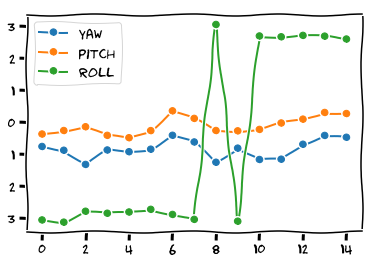

In [6]:
# intermediat steps
pos = []
rot = []
rpy = []
for path_i in res['paths'][:-1]:
    Ts = [robot.fk(qi) for qi in path_i]
    pos.append([Ti[:3, 3] for Ti in Ts])
    rot.append([Ti[:3, :3] for Ti in Ts])
    rpy.append(np.array([Quaternion(matrix=Ti[:3, :3]).yaw_pitch_roll for Ti in Ts]))

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.plot(rpy[0], '-o')
    ax.legend(['yaw', 'pitch', 'roll'])

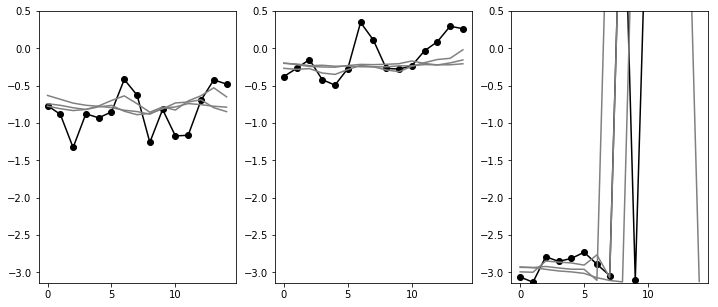

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i in range(3):
    ax[i].plot(rpy[0][:, i], 'ko-')
    for j in range(1, len(rpy)):
        ax[i].plot(rpy[j][:, i], '-', c='grey')
    
    ax[i].set_ylim([-3.14, 0.5])


In [8]:
rpy[0].shape

(15, 3)